In [1]:
# Import basic libries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import More libries/modules
import re
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords   
from datetime import datetime
import glob                     
import os
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/anelawrence/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# Get a list of all json files in a folder
file_list = glob.glob("/home/anelawrence/cardtonic_data/virtual_cards/*.json")

# Read each file and store in a list
dfs = [pd.read_json(file) for file in file_list]

# Concatenate all DataFrames into one
combine_df = pd.concat(dfs, ignore_index=True)

In [11]:
combine_df.shape

(33028, 32)

## Data Cleaning

In [15]:
df = combine_df.dropna(subset=['full_text'])
df['full_text'].isnull().sum()

0

In [19]:
# Drop duplicate tweets
df.drop_duplicates(subset=['full_text'], inplace=True)

df['full_text'].duplicated().sum()

/tmp/ipykernel_580602/279550793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=['full_text'], inplace=True)


0

In [22]:
df.shape

(21906, 32)

In [23]:
#df.to_csv('/home/anelawrence/cardtonic_data/virtual_cards/raw_virtual_card_data.csv', index=False)

In [24]:
raw_df = pd.read_csv('/home/anelawrence/cardtonic_data/virtual_cards/raw_virtual_card_data.csv')

In [38]:
raw_df.tail()
raw_df['created_at'].isnull().any()

False

In [39]:
# Define the pattern matching your CSV files 
pattern = "/home/anelawrence/cardtonic_data/virtual_cards/new_dataset_twitter*.json"

# Get a list of all files matching the pattern
files = glob.glob(pattern)

# Loop through the list and remove each file
for file in files:
    os.remove(file)
    print(f"Removed {file}")

Removed /home/anelawrence/cardtonic_data/virtual_cards/new_dataset_twitter_3.json
Removed /home/anelawrence/cardtonic_data/virtual_cards/new_dataset_twitter.json
Removed /home/anelawrence/cardtonic_data/virtual_cards/new_dataset_twitter_2.json


In [32]:
rename_map = {
    'full_text': 'tweet',
    'created_at': 'date',
}

df = df.rename(columns=rename_map)

In [33]:
df.columns

Index(['bookmark_count', 'bookmarked', 'conversation_id_str', 'date',
       'display_text_range', 'entities', 'favorite_count', 'favorited',
       'tweet', 'in_reply_to_screen_name', 'in_reply_to_status_id_str',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'quote_count',
       'reply_count', 'retweet_count', 'retweeted', 'user_id_str', 'author',
       'id', 'url', 'twitterUrl', 'searchTerms', 'extended_entities',
       'possibly_sensitive', 'possibly_sensitive_editable',
       'conversation_control', 'place', 'quoted_status_id_str',
       'composer_source', 'coordinates'],
      dtype='object')

In [44]:
df['date'].isnull().sum()
#df['tweet'].isnull().sum()

0

In [40]:
df.head()

,bookmark_count,bookmarked,conversation_id_str,date,display_text_range,entities,favorite_count,favorited,tweet,in_reply_to_screen_name,...,twitterUrl,searchTerms,extended_entities,possibly_sensitive,possibly_sensitive_editable,conversation_control,place,quoted_status_id_str,composer_source,coordinates
0,0.0,0.0,1.851117e+18,2025-03-03 23:44:35+00:00,"[10, 107]","{'hashtags': [], 'symbols': [], 'timestamps': ...",0.0,0.0,@joerogan Follow me for a chance to win a $25 ...,joerogan,...,https://twitter.com/Duke18fan/status/185111718...,dollar card since:2025-01-01 until:2025-03-04 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13.0,0.0,1.896604e+18,2025-03-03 21:39:31+00:00,"[0, 204]","{'hashtags': [], 'symbols': [], 'timestamps': ...",257.0,0.0,UPDATE: My buddy just got a card in the mail f...,CElguea,...,https://twitter.com/CElguea/status/18966043256...,dollar card since:2025-01-01 until:2025-03-04 ...,{'media': [{'display_url': 'pic.x.com/5M9Q1sf7...,0.0,1.0,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,1.896608e+18,2025-03-03 22:15:19+00:00,"[14, 198]","{'hashtags': [], 'symbols': [], 'timestamps': ...",1.0,0.0,@AuntSassyAss Deposit it so I don’t have to se...,AuntSassyAss,...,https://twitter.com/MrAuDaCity2U/status/189660...,dollar card since:2025-01-01 until:2025-03-04 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,1.896620e+18,2025-03-03 21:47:38+00:00,"[17, 79]","{'hashtags': [], 'symbols': [], 'timestamps': ...",0.0,0.0,@TheRichFromCali He buy the 5 million dollar g...,TheRichFromCali,...,https://twitter.com/theTaooftheDao/status/1896...,dollar card since:2025-01-01 until:2025-03-04 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,1.896637e+18,2025-03-03 22:17:21+00:00,"[16, 96]","{'hashtags': [], 'symbols': [], 'timestamps': ...",0.0,0.0,@JustnThePhotog Simping to Eric Trump while ru...,JustnThePhotog,...,https://twitter.com/DanielxKilleen/status/1896...,dollar card since:2025-01-01 until:2025-03-04 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df["lang"].unique()

array(['en', 'tl', 'et', 'nl'], dtype=object)

In [47]:
#droping tweet rows which languange isn't english laguage
df = df[df["lang"].isin(['en'])]
df["lang"].unique()

array(['en'], dtype=object)

In [48]:
df.shape

(21901, 32)

In [49]:
df = df[['id','url','tweet','date','retweet_count','reply_count','quote_count','in_reply_to_screen_name','searchTerms']]

In [52]:
df.columns

Index(['id', 'url', 'tweet', 'date', 'retweet_count', 'reply_count',
       'quote_count', 'in_reply_to_screen_name', 'searchTerms', 'user'],
      dtype='object')

In [51]:
#df['UserName'] = df['url'].str.slice(0, 3)
df['user'] = df['url'].apply(lambda x: x.split('/')[3])

In [78]:
# Define the pattern, using the regex OR operator
pattern = r"(dollar card|virtual card|USD card|virtual dollar card|virtual USD card)"

# Filter rows in the DataFrame that match the pattern in the 'text' column (case insensitive)
df = df[df['tweet'].str.contains(pattern, case=False, na=False)]

df.shape

/tmp/ipykernel_580602/2590659636.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df[df['tweet'].str.contains(pattern, case=False, na=False)]


(16041, 11)

In [128]:
df.to_csv('/home/anelawrence/cardtonic_data/virtual_cards/clean_virtual_card_data.csv', index=False)

## Data Preprocessing

In [11]:
df = pd.read_csv('/home/anelawrence/cardtonic_data/virtual_cards/clean_virtual_card_data.csv')

In [12]:
df.shape

(16041, 12)

In [3]:
# Define a function to check for each virtual card brand
def get_virtual_card(tweet):
    # Ensure tweet is a string and convert to lower case for case-insensitive matching
    tweet_lower = tweet.lower() if isinstance(tweet, str) else ''

    
    if any(keyword.lower() in tweet_lower for keyword in ["Barter", "Flutterwave", "FlwSupport", "Barter card", "Barter virtual card"]):
        return "Flutterwave"
    elif any(keyword.lower() in tweet_lower for keyword in ["ALAT", "Wema Bank", "wemabank"]):
        return "ALAT by Wema"
    elif any(keyword.lower() in tweet_lower for keyword in ["Chipper", "Chipper Card", "Chipper Cash", "Chipper virtual card"]):
        return "Chipper Cash"
    elif any(keyword.lower() in tweet_lower for keyword in ["Bitsika", "Bitsika card", "#Bitsika"]):
        return "Bitsika"
    elif any(keyword.lower() in tweet_lower for keyword in ["kuda", "Kuda Bank", "Kuda virtual card", "#KudaBank"]):
        return "Kuda Bank"
    elif any(keyword.lower() in tweet_lower for keyword in ["Fundall", "Fundall virtual card", "Fundall card"]):
        return "Fundall"
    elif any(keyword.lower() in tweet_lower for keyword in ["#Payday", "Payday virtual card", "Payday card", "ourpaydayHQ"]):
        return "Payday"
    elif any(keyword.lower() in tweet_lower for keyword in ["Eversend", "Eversend virtual card", "Eversend card"]):
        return "Eversend"
    elif any(keyword.lower() in tweet_lower for keyword in ["Changera", "Changera virtual card"]):
        return "Changera"
    elif any(keyword.lower() in tweet_lower for keyword in ["Grey card", "Grey"]):
        return "Grey"
    elif any(keyword.lower() in tweet_lower for keyword in ["Cardtonic", "Cardtonic virtual card", "#Cardtonic", "Cardtronic"]):
        return "Cardtonic"
    elif any(keyword.lower() in tweet_lower for keyword in ["Vesti"]):
        return "Vesti"
    elif any(keyword.lower() in tweet_lower for keyword in ["GeePay",]):
        return "GeePay"
    elif any(keyword.lower() in tweet_lower for keyword in ["Cardify"]):
        return "Cardify"
    elif any(keyword.lower() in tweet_lower for keyword in ["PSTNET"]):
        return "PSTNET"
    elif any(keyword.lower() in tweet_lower for keyword in ["Zole"]):
        return "Zole"
    elif any(keyword.lower() in tweet_lower for keyword in ["Klasha"]):
        return "Klasha"
    elif any(keyword.lower() in tweet_lower for keyword in ["Dantown"]):
        return "Dantown"
    elif any(keyword.lower() in tweet_lower for keyword in ["Spectrocard"]):
        return "Spectrocard"
    elif any(keyword.lower() in tweet_lower for keyword in ["Tribapay"]):
        return "Tribapay"
    elif any(keyword.lower() in tweet_lower for keyword in ["Bitnob"]):
        return "Bitnob"
    elif any(keyword.lower() in tweet_lower for keyword in ["Eyowo"]):
        return "Eyowo"
    elif any(keyword.lower() in tweet_lower for keyword in ["Gomoney"]):
        return "Gomoney"
    elif any(keyword.lower() in tweet_lower for keyword in ["Nearpays"]):
        return "Nearpays"
    elif any(keyword.lower() in tweet_lower for keyword in ["geegpay_hq", "geegpay"]):
        return "Geegpay"
    elif any(keyword.lower() in tweet_lower for keyword in ["swyftpay_io", "swyftpay"]):
        return "Swyftpay"
    elif any(keyword.lower() in tweet_lower for keyword in ["bitnob"]):
        return "Bitnob"
    elif any(keyword.lower() in tweet_lower for keyword in ["clevabanking", "cleva", "CleveBank"]):
        return "Cleva"
    elif any(keyword.lower() in tweet_lower for keyword in ["payswitchHQ", "sterling", "Switch_Nig"]):
        return "Switch"
    else:
        return "Others"  


In [6]:
# Apply function to DataFrame and to create 'virtual_card' column with tweet text
df['card_brand'] = df['tweet'].apply(get_virtual_card)

In [7]:
#cardtonic, Vesti, GeePay, Grey, Chipper Cash, Cardify, PSTNET, Zole, Klasha, Bitsika, Dantown, Changera, ALAT by Wema, Spectrocard, Tribapay, Fundall, Bitnob, Eyowo, Eversend, Gomoney, Nearpays
# Set the max column width to None to display the full text
pd.set_option('display.max_colwidth', None)

df[df['card_brand'] == 'swyftpay'][['tweet', 'user']].shape

(67, 2)

In [17]:
df.columns

Index(['id', 'url', 'tweet', 'date', 'retweet_count', 'reply_count',
       'quote_count', 'in_reply_to_screen_name', 'searchTerms', 'user',
       'card_brand', 'clean_tweet'],
      dtype='object')

In [ ]:
df_others = df[df['card_brand'] == 'Others'] #[['tweet', 'user']]

df_others[df_others['in_reply_to_screen_name'] == 'wemabank']

In [ ]:
# ['FlwSupport', 'FlutterwaveEng', 'chippercashapp', 'BitsikaAfrica', 'PAYDAY3Techie', 'merlineversend', 'eversendapp',
# 'tomwilladof', 'alat_ng', 'adwianprio', 'pangsitgowreng', 'joshun', 'selkcouth', 'oraspele', 'PunkPink1283539', 
#  'Dinasti_313', 'reinaldyjpr', '26TRIXZZ', 'wemabank', 'alat_tech', 'grok', 'jamesnotjemss', 'greyfinance', 
#  'get_fundall', 'VestiOfficial', 'geegpay_hq', 'CardifyAfrica', 'zoleapp', 'KlashaApp', 'godantown', 'Dantown_ads', 
#  'Tribapay', 'TribapaySupport', 'Bitnob_official', 'eyowo', 'gomoneyng', 'nearpays', 'geegpay_hq', 'swyftpay_io', 'KlashaBusiness']

In [4]:
# Dropping tweets from official account and some other non-relevant tweets
# List of users to exclude
exclude_users = [
    'FlwSupport', 'FlutterwaveEng', 'chippercashapp', 'BitsikaAfrica', 'PAYDAY3Techie', 
    'merlineversend', 'eversendapp', 'tomwilladof', 'alat_ng', 'adwianprio', 
    'pangsitgowreng', 'joshun', 'selkcouth', 'oraspele', 'PunkPink1283539', 
    'Dinasti_313', 'reinaldyjpr', '26TRIXZZ', 'wemabank', 'alat_tech', 
    'grok', 'jamesnotjemss', 'greyfinance', 'get_fundall', 'cardtonic', 
    'VestiOfficial', 'geegpay_hq', 'CardifyAfrica', 'zoleapp', 'KlashaApp', 'godantown', 'Dantown_ads', 
    'Tribapay', 'TribapaySupport', 'Bitnob_official', 'eyowo', 'gomoneyng', 'nearpays', 'geegpay_hq', 'swyftpay_io', 
    'KlashaBusiness', 'clevabanking', 'Switch_Nig', 'payswitchHQ', 'boldapp_ng', 'ZedPayCo', 'bitmamaexchange'
]

# Filter the DataFrame to drop rows where the 'User' column is in the exclude_users list
df = df[~df['user'].isin(exclude_users)]
df.shape

NameError: name 'df' is not defined

In [5]:
def filter_tweets(df):
    """
    Filters out tweets from non-relevant users based on a predefined list.

    Parameters:
        df (pandas.DataFrame): The DataFrame containing tweet data with a 'user' column.

    Returns:
        pandas.DataFrame: A DataFrame with rows removed where the 'user' is in the exclusion list.
    """
    # List of users to exclude
    exclude_users = [
        'FlwSupport', 'FlutterwaveEng', 'chippercashapp', 'BitsikaAfrica', 'PAYDAY3Techie', 
        'merlineversend', 'eversendapp', 'tomwilladof', 'alat_ng', 'adwianprio', 
        'pangsitgowreng', 'joshun', 'selkcouth', 'oraspele', 'PunkPink1283539', 
        'Dinasti_313', 'reinaldyjpr', '26TRIXZZ', 'wemabank', 'alat_tech', 
        'grok', 'jamesnotjemss', 'greyfinance', 'get_fundall', 'cardtonic', 
        'VestiOfficial', 'geegpay_hq', 'CardifyAfrica', 'zoleapp', 'KlashaApp', 'godantown', 'Dantown_ads', 
        'Tribapay', 'TribapaySupport', 'Bitnob_official', 'eyowo', 'gomoneyng', 'nearpays', 'geegpay_hq', 'swyftpay_io', 
        'KlashaBusiness', 'clevabanking', 'Switch_Nig', 'payswitchHQ', 'boldapp_ng', 'ZedPayCo', 'bitmamaexchange'
    ]
    
    # Filter out rows where the 'user' column is in the exclude_users list
    filtered_df = df[~df['user'].isin(exclude_users)]
    
    return filtered_df


In [ ]:
# Set the max column width to None to display the full text
pd.set_option('display.max_colwidth', None)

df_others = df[df['card_brand'] == 'Others'] #[['tweet', 'user']]
df_others.shape

In [10]:
def clean_text(text):
    # Replace @username with username and #hashtag with hashtag
    text = re.sub(r'@(\w+)', r'\1', text)
    text = re.sub(r'#(\w+)', r'\1', text)
    
    # Remove links
    text = re.sub(r'https?://[A-Za-z0-9./]+', '', text)
    
    # Remove floating 's
    text = re.sub(r"\'s", '', text)
    
    # Remove &amp (with optional trailing space)
    text = re.sub(r'&amp\s*', '', text)
    
    # Remove newlines
    text = re.sub(r'\n', ' ', text)
    
    # Remove non-alphabet characters (except spaces)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    
    return text.lower().strip()


In [11]:
df["clean_tweet"] = df["tweet"].apply(clean_text)

In [12]:
df["clean_tweet"].head()

0        ebay if its the fault of usps  the buyer should not be able to leave neutral or bad feedback over  positive feedback and got a negative because the card came bent over a  dollar card in a tracked pwe
1    techrose greyfinance im not happy why is conversion of dollars from my us account to my dollar card still pending for over  hours now  i created a ticket but it wasnt responded too  pls fix this promptly
2                                                                                                                                                   legendsdye billybrown cardpurchaser that a  dollar card easy
3                                                                    swyftpayio una too useless my dollar card na so una carry am go with available balance   rest password una no gree send details useless org
4                                                                                       i just created my useaccrue dollar card for seamless online payments get  ca

In [13]:
df.columns

Index(['id', 'url', 'tweet', 'date', 'retweet_count', 'reply_count',
       'quote_count', 'in_reply_to_screen_name', 'searchTerms', 'user',
       'card_brand', 'clean_tweet'],
      dtype='object')

In [14]:
# selecting the important columns for this analysis
tweets_df = df[['date', 'clean_tweet', 'url', 'user', 'card_brand', 'retweet_count']]

In [15]:
tweets_df.head()

,date,clean_tweet,url,user,card_brand,retweet_count
0,2025-03-03 21:00:15+00:00,ebay if its the fault of usps the buyer should not be able to leave neutral or bad feedback over positive feedback and got a negative because the card came bent over a dollar card in a tracked pwe,https://x.com/IJudgeWrestling/status/1896666955349950657,IJudgeWrestling,Others,0.0
1,2025-03-03 21:40:09+00:00,techrose greyfinance im not happy why is conversion of dollars from my us account to my dollar card still pending for over hours now i created a ticket but it wasnt responded too pls fix this promptly,https://x.com/Godswill_10/status/1896370664577343928,Godswill_10,Grey,0.0
2,2025-03-03 20:47:23+00:00,legendsdye billybrown cardpurchaser that a dollar card easy,https://x.com/ddem212/status/1896264691854512565,ddem212,Others,0.0
3,2025-03-03 20:13:48+00:00,swyftpayio una too useless my dollar card na so una carry am go with available balance rest password una no gree send details useless org,https://x.com/LeoKhal70051884/status/1896633226049049076,LeoKhal70051884,swyftpay,0.0
4,2025-03-03 20:36:28+00:00,i just created my useaccrue dollar card for seamless online payments get cashback when you create yours using this link,https://x.com/OtfRedeemer/status/1896660972473098338,OtfRedeemer,Others,1.0


### Apply Sentiment Analysis Model

In [16]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load tokenizer and model for a three-class sentiment analysis
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Define labels corresponding to the model's output indices
labels = ["negative", "neutral", "positive"]

# Sentiment Analysis function
def predict_sentiment(tweet):
    # Encode the text with truncation
    inputs = tokenizer(tweet, return_tensors="pt", truncation=True, max_length=512)
    outputs = model(**inputs)
    # Convert logits to probabilities
    scores = outputs.logits.detach().numpy()[0]
    scores = np.exp(scores) / np.sum(np.exp(scores))
    max_index = scores.argmax()
    return pd.Series([labels[max_index], scores[max_index]])

In [17]:
# Apply the prediction function to the DataFrame
tweets_df[['sentiment', 'confidence']] = tweets_df['clean_tweet'].apply(predict_sentiment)

/tmp/ipykernel_594276/1524018106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_df[['sentiment', 'confidence']] = tweets_df['clean_tweet'].apply(predict_sentiment)
/tmp/ipykernel_594276/1524018106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_df[['sentiment', 'confidence']] = tweets_df['clean_tweet'].apply(predict_sentiment)


In [19]:
tweets_df[['sentiment', 'confidence','clean_tweet', 'date']].head(10)

,sentiment,confidence,clean_tweet,date
0,negative,0.771423,ebay if its the fault of usps the buyer should not be able to leave neutral or bad feedback over positive feedback and got a negative because the card came bent over a dollar card in a tracked pwe,2025-03-03 21:00:15+00:00
1,negative,0.937683,techrose greyfinance im not happy why is conversion of dollars from my us account to my dollar card still pending for over hours now i created a ticket but it wasnt responded too pls fix this promptly,2025-03-03 21:40:09+00:00
2,neutral,0.729192,legendsdye billybrown cardpurchaser that a dollar card easy,2025-03-03 20:47:23+00:00
3,negative,0.683774,swyftpayio una too useless my dollar card na so una carry am go with available balance rest password una no gree send details useless org,2025-03-03 20:13:48+00:00
4,neutral,0.713939,i just created my useaccrue dollar card for seamless online payments get cashback when you create yours using this link,2025-03-03 20:36:28+00:00
5,neutral,0.788037,dollar card anyone chipper wan rip me,2025-03-03 20:04:42+00:00
6,neutral,0.581777,unusualwhales yeah because million people are going to buy a million dollar card,2025-03-03 17:23:34+00:00
7,positive,0.640563,international payments made easy get your payswitch dollar card for just and start spending globally payswitch dollarcard globalpayment,2025-03-03 17:46:36+00:00
8,neutral,0.875166,who has an useaccrue referral code earn when i create my virtual dollar card using your referral code,2025-03-03 16:43:14+00:00
9,positive,0.771042,with origine you can connect your favourite code repositories including github gitlab and bitbucket pay in naira no need for a dollar card visit to get started,2025-03-03 16:46:22+00:00


In [24]:
# Count positive, negative & neural values
print(tweets_df['sentiment'].value_counts())
tweets_df['sentiment'].value_counts('proportion').to_list()

sentiment
neutral     8094
negative    3888
positive    3642
Name: count, dtype: int64


[0.5180491551459293, 0.2488479262672811, 0.23310291858678955]

In [25]:
#creating a polarity column to show if the tweet is positive, negative or neutral (1,-1,0)
def analysis(score):
    if score == "negative":
        return -1
    elif score == "neutral":
        return 0
    else:
        return 1

tweets_df['polarity'] = tweets_df['sentiment'].apply(analysis)

/tmp/ipykernel_594276/659878373.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_df['polarity'] = tweets_df['sentiment'].apply(analysis)


In [28]:
tweets_df[['date', 'sentiment', 'confidence', 'polarity','clean_tweet', 'card_brand']].head()

,date,sentiment,confidence,polarity,clean_tweet,card_brand
0,2025-03-03 21:00:15+00:00,negative,0.771423,-1,ebay if its the fault of usps the buyer should not be able to leave neutral or bad feedback over positive feedback and got a negative because the card came bent over a dollar card in a tracked pwe,Others
1,2025-03-03 21:40:09+00:00,negative,0.937683,-1,techrose greyfinance im not happy why is conversion of dollars from my us account to my dollar card still pending for over hours now i created a ticket but it wasnt responded too pls fix this promptly,Grey
2,2025-03-03 20:47:23+00:00,neutral,0.729192,0,legendsdye billybrown cardpurchaser that a dollar card easy,Others
3,2025-03-03 20:13:48+00:00,negative,0.683774,-1,swyftpayio una too useless my dollar card na so una carry am go with available balance rest password una no gree send details useless org,swyftpay
4,2025-03-03 20:36:28+00:00,neutral,0.713939,0,i just created my useaccrue dollar card for seamless online payments get cashback when you create yours using this link,Others


In [29]:
print(tweets_df['clean_tweet'].isnull().any())
print(tweets_df['date'].isnull().any())

False
False


In [50]:
tweets_df = tweets_df[~((tweets_df['clean_tweet'].str.contains('kenya', case=False, na=False)) &
    (tweets_df['card_brand'] == 'Others'))].reset_index(drop=True)

In [51]:
tweets_df.shape

(15600, 9)

In [52]:
tweets_df.to_csv('/home/anelawrence/cardtonic_data/virtual_cards/analyzed_vc_data.csv', index=False)

## Data Visualization and Exploratory

In [12]:
tweets_df = pd.read_csv('/home/anelawrence/cardtonic_data/virtual_cards/analyzed_vc_data.csv')

In [13]:
tweets_df.shape

(15600, 9)

In [14]:
# Apply function to DataFrame and to create 'virtual_card' column with tweet text
tweets_df['card_brand'] = tweets_df['clean_tweet'].apply(get_virtual_card)

In [15]:
tweets_df = filter_tweets(tweets_df)
tweets_df.shape

(15529, 9)

In [16]:
tweets_df = tweets_df[~((tweets_df['user'] == 'dtb_uganda') |
    (tweets_df['clean_tweet'].str.contains('mtnmomoug|mtnug|momo|Zypto', case=False, na=False)))]  #[['date', 'clean_tweet', 'user', 'sentiment', 'card_brand']]
tweets_df.shape

(15384, 9)

In [17]:
tweets_df = tweets_df[~((tweets_df['user'] == 'RedotPay') |
    (tweets_df['clean_tweet'].str.contains('RedotPay', case=False, na=False)))]
tweets_df.shape

(15247, 9)

In [18]:
tweets_df[((tweets_df['user'] == 'bybitofficial') |
    (tweets_df['clean_tweet'].str.contains('Bybit', case=False, na=False)))].shape  #[['date', 'clean_tweet', 'user', 'sentiment', 'card_brand']]
#tweets_df.shape

(23, 9)

In [75]:
print(tweets_df['clean_tweet'].isnull().any())
print(tweets_df['date'].isnull().any())

False
False


In [19]:
tweets_df.to_csv('/home/anelawrence/cardtonic_data/virtual_cards/visualized_vc_data.csv', index=False)

In [76]:
total_tweets = tweets_df.shape[0]
print("Total tweet: ", total_tweets)

user_count = tweets_df['user'].nunique()
print('Number of Users:', user_count)

Total tweet:  15247
Number of Users: 11150


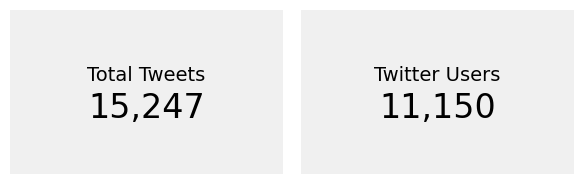

In [77]:
# Apply a Seaborn theme for consistent styling
sns.set_theme(style="white")

# Create a figure with 1 row and 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(6, 2))  # adjust figsize as needed

for ax in axes:
    ax.axis('off')  # hide the axes for a clean card look
    # Add a background rectangle to simulate the card
    card_bg = plt.Rectangle((0, 0), 1, 1, transform=ax.transAxes, color="#f0f0f0")
    ax.add_patch(card_bg)

# First card
axes[0].text(0.5, 0.6, "Total Tweets", fontsize=14, ha="center", va="center", color="black")
axes[0].text(0.5, 0.4, f"{total_tweets:,}", fontsize=24, ha="center", va="center", color="black")

# Second card
axes[1].text(0.5, 0.6, "Twitter Users", fontsize=14, ha="center", va="center", color="black")
axes[1].text(0.5, 0.4, f"{user_count:,}", fontsize=24, ha="center", va="center", color="black")

# Save the figure as an image file (download it)
#plt.savefig("tweet_card_visual.png", dpi=300)

plt.tight_layout()
plt.show()

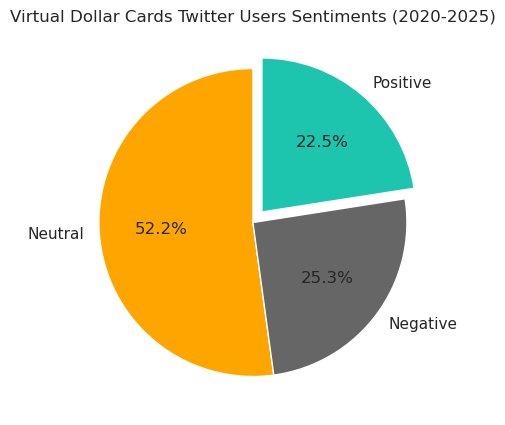

In [78]:
# Plotting a pie chart to show distribution of Sentiments
plt.figure(figsize=[7,5], facecolor='none')
plt.pie(tweets_df['sentiment'].value_counts(), labels=['Neutral', "Negative",'Positive'], colors=['orange', '#666666', '#1dc5af'], startangle=90, explode= [0,0,0.09], autopct='%1.1f%%');
plt.title('Virtual Dollar Cards Twitter Users Sentiments (2020-2025)');

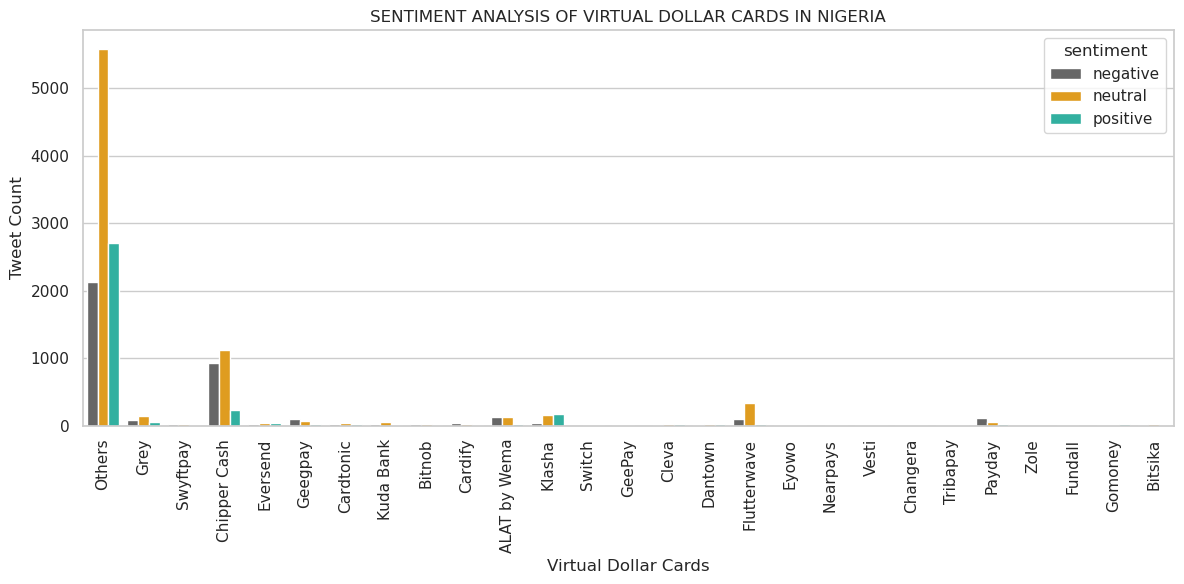

In [79]:
# Set up the seaborn style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))

# Define your custom palette mapping
palette = {'positive': '#1dc5af', 'negative': '#666666', 'neutral': 'orange'}

sns.countplot(data=tweets_df, x='card_brand', hue='sentiment', palette=palette)
plt.title('Sentiment Analysis of Virtual Dollar Cards in Nigeria'.upper())

plt.xlabel('Virtual Dollar Cards')
plt.ylabel('Tweet Count')

plt.xticks(rotation=90)  # Rotate x labels for readability
plt.tight_layout()   

plt.show()

In [81]:
# Set the max column width to None to display the full text
pd.set_option('display.max_colwidth', None)

df_others = tweets_df[tweets_df['card_brand'] == 'Others'] #[['tweet', 'user']]
df_others[df_others['sentiment'] == 'negative'][['clean_tweet', 'user', 'sentiment']].shape

(2128, 3)

In [82]:
# Group by 'card_brand' and count sentiments
sentiment_counts = tweets_df.groupby('card_brand')['sentiment'].value_counts().unstack(fill_value=0)

# Add a Total column if you want the total count of tweets per brand
sentiment_counts['Total_tweets'] = sentiment_counts.sum(axis=1)

# Create a Sentiment Ratio column formatted as percentages "positive% : negative% : neutral%"
sentiment_counts['Sentiment Ratio (PO:NE:NR)'] = sentiment_counts.apply(
    lambda row: (
        f"{(row.get('positive', 0) / row['Total_tweets'] * 100):.1f}% : "
        f"{(row.get('negative', 0) / row['Total_tweets'] * 100):.1f}% : "
        f"{(row.get('neutral', 0) / row['Total_tweets'] * 100):.1f}%"
    ) if row['Total_tweets'] > 0 else "0.00% : 0.00% : 0.00%",
    axis=1
)
# Select only the Total and Sentiment Ratio columns (and reset index if needed)
result_view = sentiment_counts[['Total_tweets', 'Sentiment Ratio (PO:NE:NR)']].sort_values(by='Total_tweets', ascending=False).reset_index()

result_view.head(11)

sentiment,card_brand,Total_tweets,Sentiment Ratio (PO:NE:NR)
0,Others,10417,26.0% : 20.4% : 53.6%
1,Chipper Cash,2283,10.3% : 40.5% : 49.2%
2,Flutterwave,463,4.8% : 22.2% : 73.0%
3,Klasha,363,45.7% : 9.4% : 44.9%
4,Grey,283,16.6% : 31.8% : 51.6%
5,ALAT by Wema,272,9.6% : 46.0% : 44.5%
6,Payday,189,9.0% : 62.4% : 28.6%
7,Geegpay,187,10.7% : 56.1% : 33.2%
8,Eversend,101,32.7% : 26.7% : 40.6%
9,Kuda Bank,86,7.0% : 29.1% : 64.0%


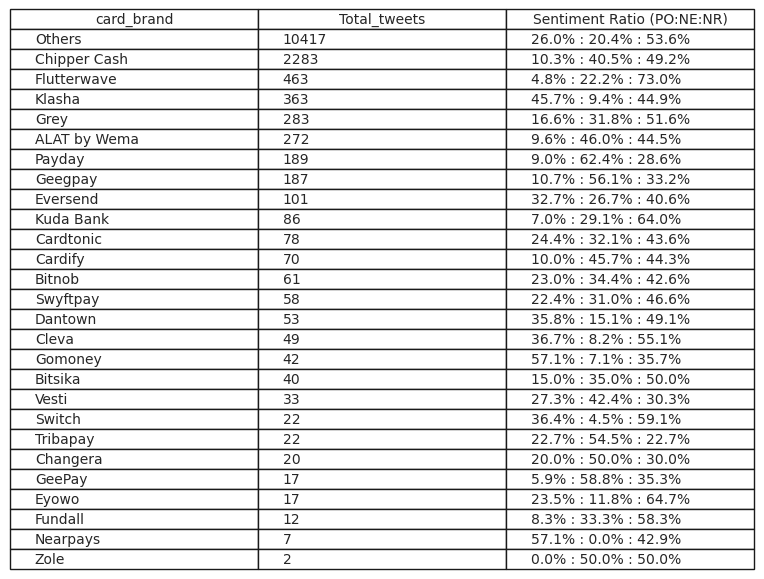

In [83]:

# Set a seaborn style for the visualization
sns.set(style="whitegrid")

# Create a figure and an axis without any plot axes since we'll use a table
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('tight')
ax.axis('off')

# Create the table
table = ax.table(cellText=result_view.values,
                 colLabels=result_view.columns,
                 cellLoc='left',
                 loc='center')

# Adjust table font size and scale to improve readability
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Optionally add a title to the figure
#plt.title("Brand and Sentiment Ratios", fontsize=14, pad=20)

# Display the table
plt.show()


In [20]:
df_ct = tweets_df[tweets_df['card_brand'] == 'Cardtonic'] #[['tweet', 'user']]
df_ct[df_ct['sentiment'] == 'positive'][['clean_tweet', 'user', 'sentiment']].shape

(19, 3)

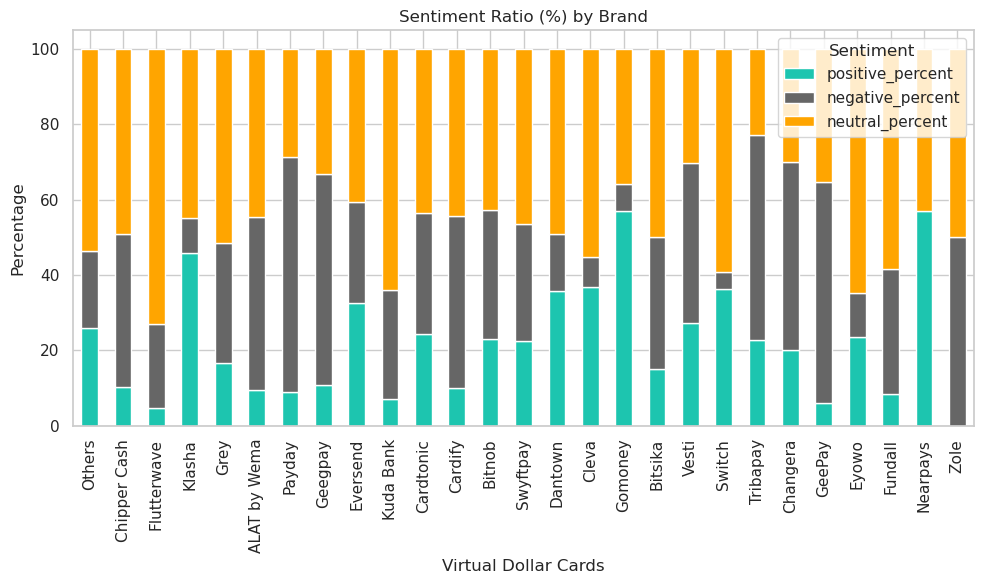

In [100]:

# Group by 'card_brand' and count sentiments
sentiment_counts = tweets_df.groupby('card_brand')['sentiment'].value_counts().unstack(fill_value=0)

# Add a Total column (total count per brand)
sentiment_counts['Total'] = sentiment_counts.sum(axis=1)

# Compute sentiment percentages for each brand
sentiment_counts['positive_percent'] = (sentiment_counts.get('positive', 0) / sentiment_counts['Total']) * 100
sentiment_counts['negative_percent'] = (sentiment_counts.get('negative', 0) / sentiment_counts['Total']) * 100
sentiment_counts['neutral_percent'] = (sentiment_counts.get('neutral', 0) / sentiment_counts['Total']) * 100

# Sort brands by Total in descending order for visualization
sentiment_counts = sentiment_counts.sort_values(by='Total', ascending=False)

# Define your custom palette mapping
colors = ['#1dc5af', '#666666', 'orange']

# Create a stacked bar chart
ax = sentiment_counts[['positive_percent', 'negative_percent', 'neutral_percent']].plot(
    kind='bar', stacked=True, figsize=(10, 6), color=colors
)

ax.set_ylabel('Percentage')
ax.set_xlabel('Virtual Dollar Cards')
ax.set_title('Sentiment Ratio (%) by Brand')
plt.legend(title='Sentiment')
plt.tight_layout()

# Save the figure as an image file (download it)
plt.savefig("sentiment_ratio.png", dpi=300)
plt.show()


/tmp/ipykernel_835546/4278965602.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_counts = tweets_df.groupby(tweets_df['date'].dt.to_period('M')).size().reset_index(name='count')
/tmp/ipykernel_835546/4278965602.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="date", y="count", data=monthly_counts, palette="viridis")


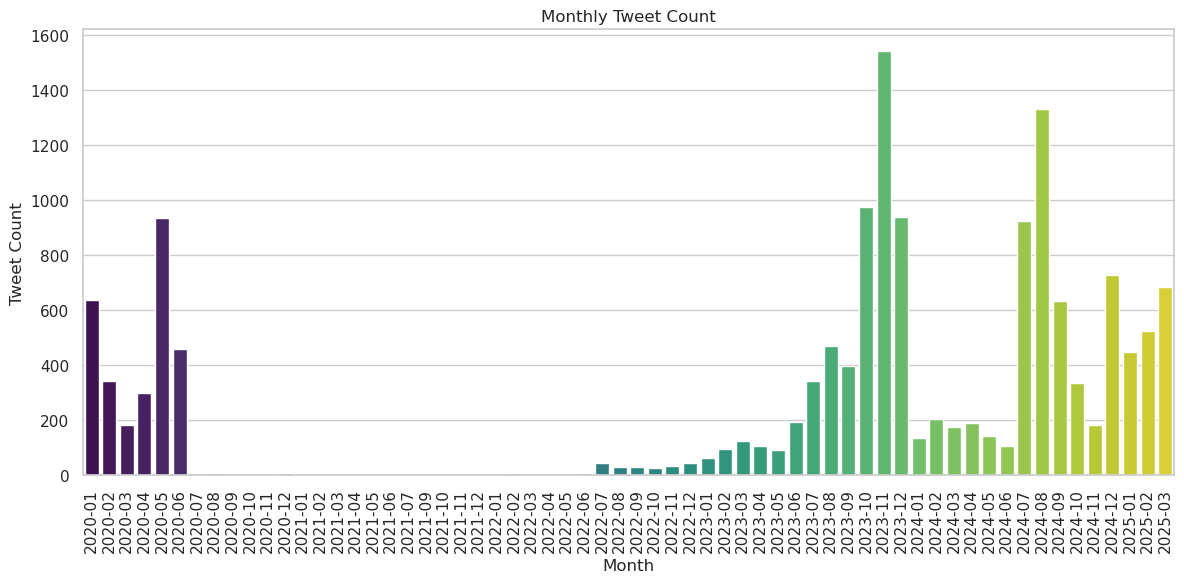

In [21]:
tweets_df["date"] = pd.to_datetime(tweets_df["date"])

# Group by month using the dt.to_period accessor and count tweets
monthly_counts = tweets_df.groupby(tweets_df['date'].dt.to_period('M')).size().reset_index(name='count')

#monthly_counts = tweets_df.groupby(['virtual_card'])['month_year'].size().reset_index()


# Set up the seaborn style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))

# Create the barplot
sns.barplot(x="date", y="count", data=monthly_counts, palette="viridis")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.xlabel("Month")
plt.ylabel("Tweet Count")
plt.title("Monthly Tweet Count")

plt.tight_layout()

plt.show()

In [ ]:
#tweets_df # Example: Extract rows for June 2021
filtered_df = tweets_df[(tweets_df['date'].dt.year == 2020) & (tweets_df['date'].dt.month == 6)]
filtered_df

#tweets_df[tweets_df['sentiment'] == 'negative']

/tmp/ipykernel_632605/1661465766.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  tweets_df['month_year'] = tweets_df['date'].dt.to_period('M').astype(str)


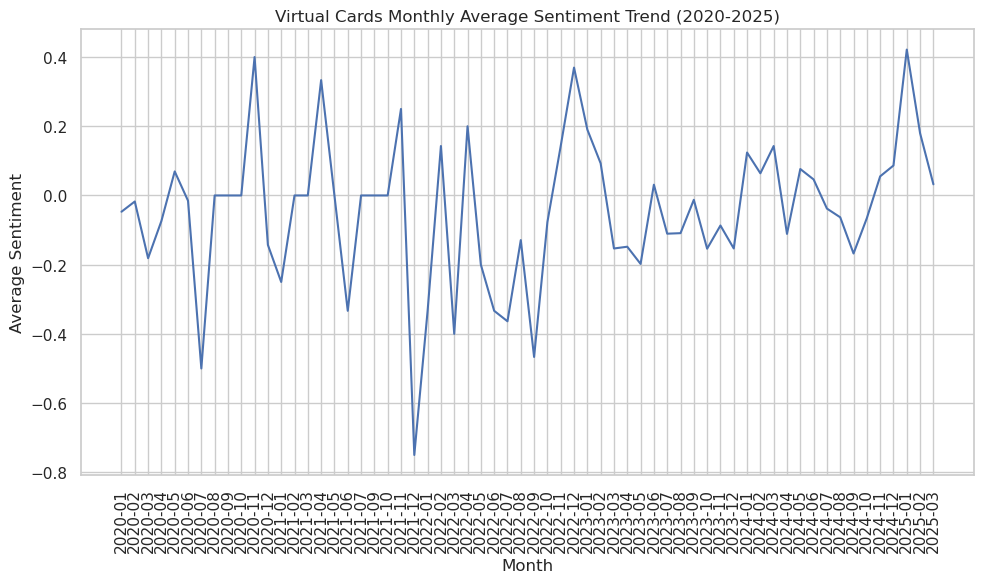

In [85]:
# Extract month-year and group by it

#tweets_df["date"] = pd.to_datetime(tweets_df["date"])

# This creates a new column in 'YYYY-MM' format
tweets_df['month_year'] = tweets_df['date'].dt.to_period('M').astype(str)
# Group by month and compute the average sentiment for each month
monthly_sentiment = tweets_df.groupby('month_year')['polarity'].mean().reset_index()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the monthly trend using Seaborn
sns.lineplot(data=monthly_sentiment, x='month_year', y='polarity', ax=ax)
plt.title('Virtual Cards Monthly Average Sentiment Trend (2020-2025)')
plt.xlabel('Month')
plt.ylabel('Average Sentiment')

plt.xticks(rotation=90)  # Rotate x labels for readability
plt.tight_layout()      # Adjust layout if necessary
plt.show()

### Creating word cloud

In [86]:
stop_words = stopwords.words('english')
stop_words = stop_words + ['u', 'na', 'know', 'one', 'go', 'make', 'see', 'dont', 'amp', 'im', 'cant']
tweets_df['cleaned_words'] = tweets_df['clean_tweet'].astype(str).apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

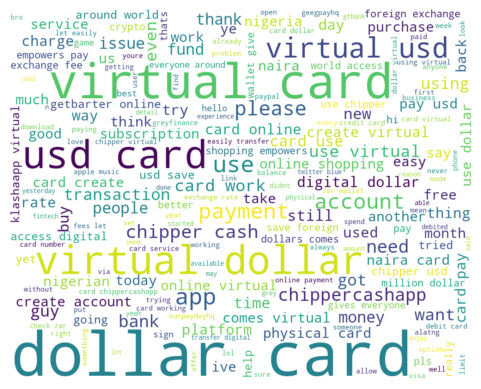

In [87]:
#Creating the text variable
text = " ".join(i for i in tweets_df.cleaned_words)

wc = WordCloud(width = 1000, height = 800, background_color = "white").generate(text)

#Remove axis and display the data as image
plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")

### Negative Tweets

In [88]:
negative_df = tweets_df[tweets_df['sentiment'] == 'negative']

In [89]:
negative_df.shape

(3858, 11)

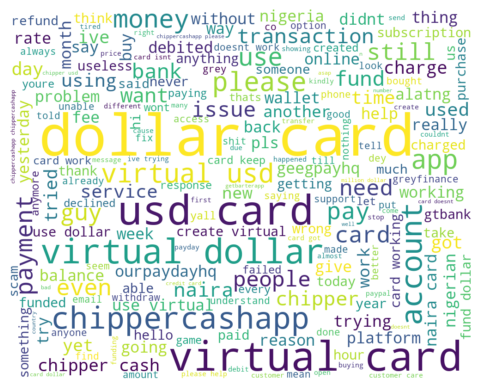

In [90]:
#Creating the text variable
text = " ".join(i for i in negative_df.cleaned_words.astype(str))

wc = WordCloud(width = 1000, height = 800, background_color = "white").generate(text)

#Remove axis and display the data as image
plt.axis("off")

plt.imshow(wc, interpolation = "bilinear")

In [91]:
negative_df.to_csv('/home/anelawrence/cardtonic_data/virtual_cards/vc_negative_tweets.csv', index=False)

### Positive Tweets

In [92]:
positive_df = tweets_df[tweets_df['sentiment'] == 'positive']

In [93]:
positive_df.shape

(3436, 11)

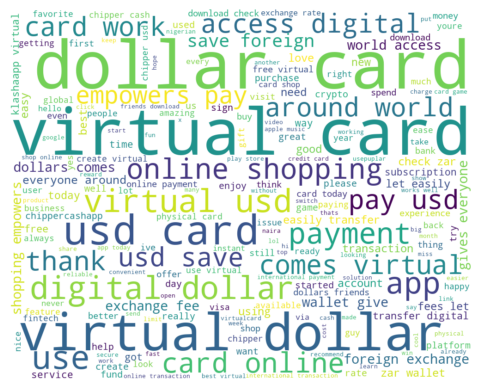

In [94]:
#Creating the text variable
text = " ".join(i for i in positive_df.cleaned_words)

wc = WordCloud(width = 1000, height = 800, background_color = "white").generate(text)

#Remove axis and display the data as image
plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")

In [95]:
positive_df.to_csv('/home/anelawrence/cardtonic_data/virtual_cards/vc_positive_tweets.csv', index=False)

### Highlighting top brand in term of customer satisfaction

In [105]:
df_ct = tweets_df[~(tweets_df['card_brand'] == 'Others')] #[['tweet', 'user']]
po_others = df_ct[df_ct['sentiment'] == 'positive'][['date', 'clean_tweet', 'user', 'sentiment', 'confidence', 'card_brand']]
#po_others.shape
po_others.to_csv('/home/anelawrence/cardtonic_data/virtual_cards/cards_positive_tweets.csv', index=False)

In [97]:
Klasha_df = tweets_df[tweets_df['card_brand'] == 'Klasha'] #[['tweet', 'user']]
Klasha_df[Klasha_df['user'] == 'KlashaBusiness'][['date', 'clean_tweet', 'user', 'sentiment']].shape

(0, 4)

**Klasha Positive tweets**

In [98]:
po_Klasha = Klasha_df[Klasha_df['sentiment'] == 'positive']
po_Klasha.shape

(166, 11)

In [74]:
po_Klasha.to_csv('/home/anelawrence/cardtonic_data/virtual_cards/klasha_positive_tweets.csv', index=False)

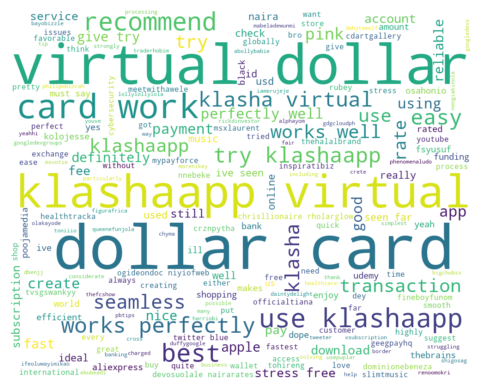

In [70]:
#Creating the text variable
text = " ".join(i for i in po_Klasha.cleaned_words.astype(str))

wc = WordCloud(width = 1000, height = 800, background_color = "white").generate(text)

#Remove axis and display the data as image
plt.axis("off")

plt.imshow(wc, interpolation = "bilinear")

**Klasha Negative tweets**

In [72]:
ne_Klasha = Klasha_df[Klasha_df['sentiment'] == 'negative']
ne_Klasha.shape

(34, 11)

In [73]:
ne_Klasha.to_csv('/home/anelawrence/cardtonic_data/virtual_cards/Klasha_negative_tweets.csv', index=False)

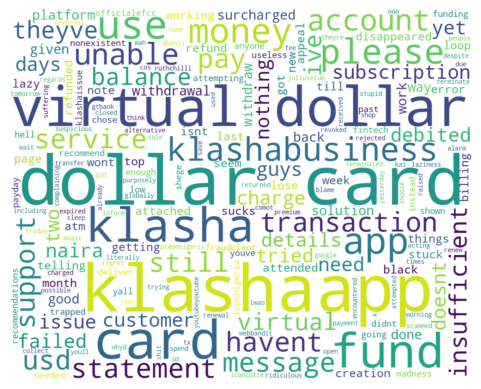

In [71]:
#Creating the text variable
text = " ".join(i for i in ne_Klasha.cleaned_words.astype(str))

wc = WordCloud(width = 1000, height = 800, background_color = "white").generate(text)

#Remove axis and display the data as image
plt.axis("off")

plt.imshow(wc, interpolation = "bilinear")

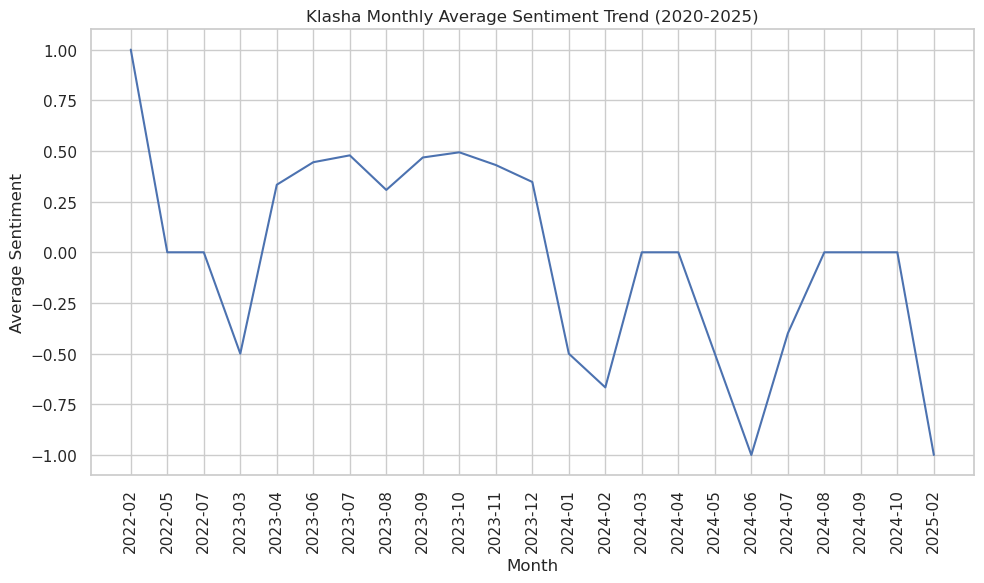

In [69]:
# Extract month-year and group by it

#tweets_df["date"] = pd.to_datetime(tweets_df["date"])

# This creates a new column in 'YYYY-MM' format
#Klasha_df['month_year'] = Klasha_df['date'].dt.to_period('M').astype(str)
# Group by month and compute the average sentiment for each month
monthly_sentiment = Klasha_df.groupby('month_year')['polarity'].mean().reset_index()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the monthly trend using Seaborn
sns.lineplot(data=monthly_sentiment, x='month_year', y='polarity', ax=ax)
plt.title('Klasha Monthly Average Sentiment Trend (2020-2025)')
plt.xlabel('Month')
plt.ylabel('Average Sentiment')

plt.xticks(rotation=90)  # Rotate x labels for readability
plt.tight_layout()      # Adjust layout if necessary
plt.show()